data source:
    
    https://github.com/fivethirtyeight/data/tree/master/bad-drivers

In [31]:
import pandas as pd
import seaborn as sns

car_acc = pd.read_csv('datasets/road-accidents.csv', comment='#', sep='|')

rows_and_cols = car_acc.shape
print('There are {} rows and {} columns.\n'.format(
    rows_and_cols[0], rows_and_cols[1]))

car_acc_information = car_acc.info()
print(car_acc_information)

car_acc.tail()

There are 51 rows and 5 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB
None


,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
46,Virginia,12.7,19,27,88
47,Washington,10.6,42,33,86
48,West Virginia,23.8,34,28,87
49,Wisconsin,13.8,36,33,84
50,Wyoming,17.4,42,32,90


'##### COLUMN ABBREVIATIONS #####',
 '# drvr_fatl_col_bmiles = Number of drivers involved in fatal collisions per billion miles (2011)',
 '# perc_fatl_speed = Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding (2009)',
 '# perc_fatl_alcohol = Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired (2011)',
 '# perc_fatl_1st_time = Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents (2011)',

In [2]:
car_acc.shape

(51, 5)

In [3]:
car_acc.columns

Index(['state', 'drvr_fatl_col_bmiles', 'perc_fatl_speed', 'perc_fatl_alcohol',
       'perc_fatl_1st_time'],
      dtype='object')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


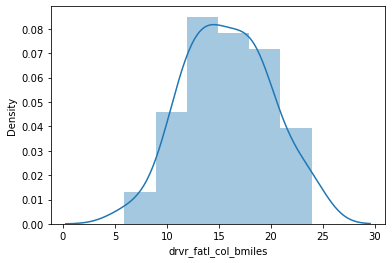

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


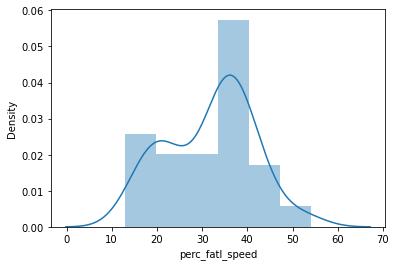

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


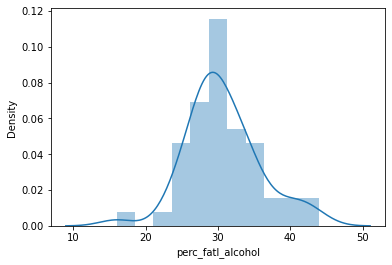

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


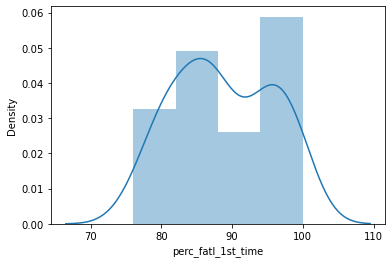

In [36]:
for i in ['drvr_fatl_col_bmiles', 'perc_fatl_speed', 'perc_fatl_alcohol','perc_fatl_1st_time']:
    sns.distplot(car_acc[i])
    plt.show()

       drvr_fatl_col_bmiles  perc_fatl_speed  perc_fatl_alcohol  \
count             51.000000        51.000000          51.000000   
mean              15.790196        31.725490          30.686275   
std                4.122002         9.633438           5.132213   
min                5.900000        13.000000          16.000000   
25%               12.750000        23.000000          28.000000   
50%               15.600000        34.000000          30.000000   
75%               18.500000        38.000000          33.000000   
max               23.900000        54.000000          44.000000   

       perc_fatl_1st_time  
count            51.00000  
mean             88.72549  
std               6.96011  
min              76.00000  
25%              83.50000  
50%              88.00000  
75%              95.00000  
max             100.00000  


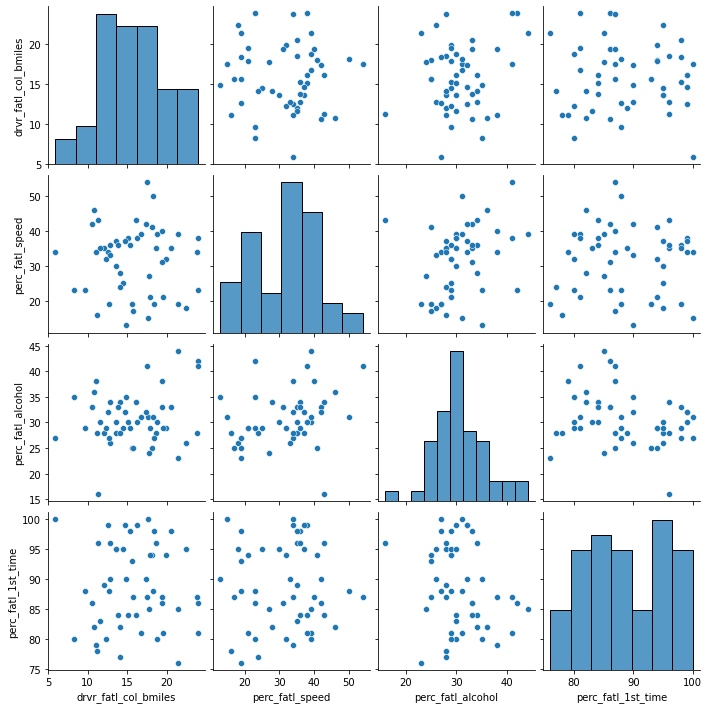

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sum_stat_car = car_acc.describe()
print(sum_stat_car)

sns.pairplot(car_acc)
plt.show()

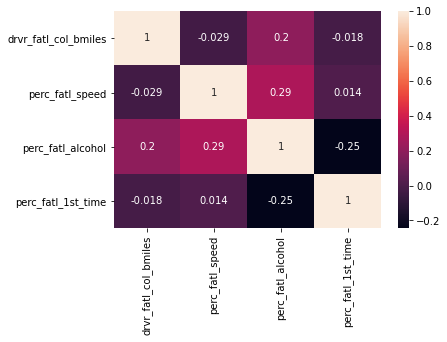

In [5]:
corr_columns = car_acc.corr()
sns.heatmap(corr_columns,annot=True)
plt.show()

In [ ]:
#Result: Alcohol seems to influence maximum the number of accidents as per correlation

In [6]:
from sklearn import linear_model

features = car_acc[['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time']]
target = car_acc['drvr_fatl_col_bmiles']

reg = linear_model.LinearRegression()

reg.fit(features, target)

fit_coef = reg.coef_
fit_coef

array([-0.04180041,  0.19086404,  0.02473301])

The cumulative variance of the first two principal componenets is 0.7947


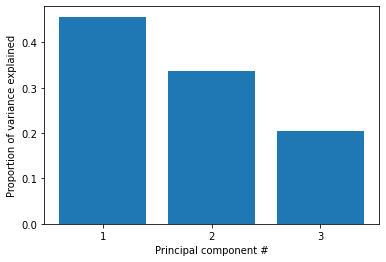

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

from sklearn.decomposition import PCA
pca = PCA()

pca.fit(features_scaled)

import matplotlib.pyplot as plt
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.xticks([1, 2, 3])

two_first_comp_var_exp = pca.explained_variance_ratio_.cumsum()[1]
print("The cumulative variance of the first two principal componenets is {}".format(
    round(two_first_comp_var_exp, 5)))

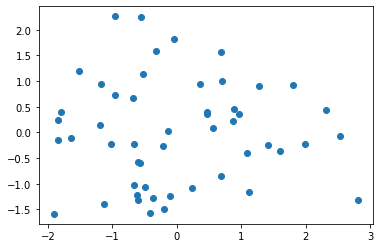

In [8]:
pca = PCA(n_components=2)
p_comps = pca.fit_transform(features_scaled)

p_comp1 = p_comps[:, 0]
p_comp2 = p_comps[:, 1]

plt.scatter(p_comp1, p_comp2);

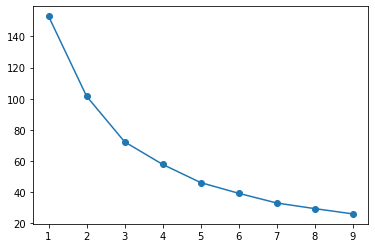

In [9]:
from sklearn.cluster import KMeans

ks = range(1, 10)
inertias = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=8)
    km.fit(features_scaled)
    inertias.append(km.inertia_)
    
plt.plot(ks, inertias, marker='o')
plt.show('Scree Plot')

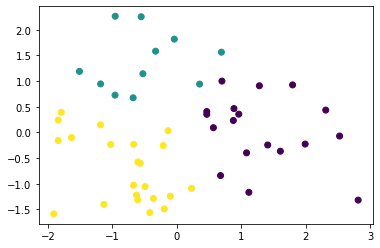

In [10]:
km = KMeans(n_clusters=3, random_state=8)
km.fit(features_scaled)
plt.scatter(p_comps[:, 0], p_comps[:, 1], c=km.labels_);

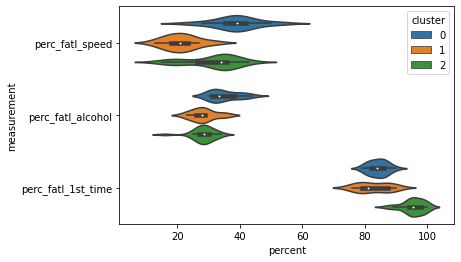

In [11]:
car_acc['cluster'] = km.labels_

melt_car = pd.melt(car_acc, id_vars='cluster', var_name='measurement', value_name='percent',
                   value_vars=['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time'])

sns.violinplot(y='measurement', x='percent', data=melt_car, hue='cluster');

In [12]:
melt_car

,cluster,measurement,percent
0,0,perc_fatl_speed,39
1,2,perc_fatl_speed,41
2,2,perc_fatl_speed,35
3,2,perc_fatl_speed,18
4,2,perc_fatl_speed,35
...,...,...,...
148,1,perc_fatl_1st_time,88
149,0,perc_fatl_1st_time,86
150,2,perc_fatl_1st_time,87
151,0,perc_fatl_1st_time,84


In [13]:
miles_driven = pd.read_csv('datasets/miles-driven.csv', sep='|')
miles_driven

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784
5,Colorado,46606
6,Connecticut,31197
7,Delaware,9028
8,District of Columbia,3568
9,Florida,191855


,count,mean,sum
cluster,,,
0,18,911.406439,16405.3159
1,11,860.505945,9465.5654
2,22,898.378595,19764.3291


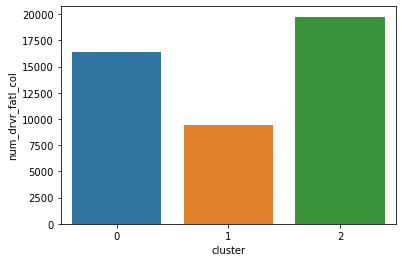

In [14]:
car_acc_miles = car_acc.merge(miles_driven, on='state')

car_acc_miles['num_drvr_fatl_col'] = car_acc_miles['drvr_fatl_col_bmiles'] * car_acc_miles['million_miles_annually'] / 1000

sns.barplot(x='cluster', y='num_drvr_fatl_col', data=car_acc_miles, estimator=sum, ci=None)

count_mean_sum = car_acc_miles.groupby('cluster')['num_drvr_fatl_col'].agg(['count', 'mean', 'sum'])
count_mean_sum

#**Result: 

**Cluster number 2 is selected as it has highest number of accident within that cluster

In [15]:
selected = 2 
car_acc[car_acc['cluster']==selected]['state']

1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
7                 Delaware
8     District of Columbia
9                  Florida
10                 Georgia
12                   Idaho
13                Illinois
14                 Indiana
18               Louisiana
20                Maryland
24             Mississippi
28                  Nevada
31              New Mexico
36                Oklahoma
37                  Oregon
44                    Utah
45                 Vermont
48           West Virginia
Name: state, dtype: object

In [16]:
#put this on a map with red color

In [19]:
cluster_2 = car_acc[car_acc['cluster']==selected]

In [20]:
cluster_2.columns

Index(['state', 'drvr_fatl_col_bmiles', 'perc_fatl_speed', 'perc_fatl_alcohol',
       'perc_fatl_1st_time', 'cluster'],
      dtype='object')

In [22]:
car_acc_miles_cluster_2 = cluster_2.merge(miles_driven, on='state',how = 'left' )

car_acc_miles_cluster_2['num_drvr_fatl_col'] = car_acc_miles_cluster_2['drvr_fatl_col_bmiles'] * car_acc_miles_cluster_2['million_miles_annually'] / 1000

car_acc_miles_cluster_2

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster,million_miles_annually,num_drvr_fatl_col
0,Alaska,18.1,41,25,94,2,4593,83.1333
1,Arizona,18.6,35,28,96,2,59575,1108.0950
2,Arkansas,22.4,18,26,95,2,32953,738.1472
3,California,12.0,35,28,89,2,320784,3849.4080
4,Colorado,13.6,37,28,95,2,46606,633.8416
5,Delaware,16.2,38,30,99,2,9028,146.2536
6,District of Columbia,5.9,34,27,100,2,3568,21.0512
7,Florida,17.9,21,29,94,2,191855,3434.2045
8,Georgia,15.6,19,25,93,2,108454,1691.8824
9,Idaho,15.3,36,29,98,2,15937,243.8361


In [24]:
car_acc_miles_cluster_2.columns

Index(['state', 'drvr_fatl_col_bmiles', 'perc_fatl_speed', 'perc_fatl_alcohol',
       'perc_fatl_1st_time', 'cluster', 'million_miles_annually',
       'num_drvr_fatl_col'],
      dtype='object')

In [26]:
car_acc_miles_cluster_2[['perc_fatl_speed', 'perc_fatl_alcohol',
       'perc_fatl_1st_time', 'num_drvr_fatl_col']].corr()

,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,num_drvr_fatl_col
perc_fatl_speed,1.000000,-0.110589,-0.044841,-0.264429
perc_fatl_alcohol,-0.110589,1.000000,0.271862,0.106010
perc_fatl_1st_time,-0.044841,0.271862,1.000000,-0.408456
num_drvr_fatl_col,-0.264429,0.106010,-0.408456,1.000000


In [30]:
car_acc_miles_cluster_2[['perc_fatl_speed', 'perc_fatl_alcohol',
       'perc_fatl_1st_time', 'num_drvr_fatl_col']].corr(method = 'kendall' )

,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,num_drvr_fatl_col
perc_fatl_speed,1.000000,0.055055,0.069143,-0.256121
perc_fatl_alcohol,0.055055,1.000000,0.314557,0.143925
perc_fatl_1st_time,0.069143,0.314557,1.000000,-0.280168
num_drvr_fatl_col,-0.256121,0.143925,-0.280168,1.000000


In [ ]:
#The reason for accident in cluster 2 with highest number of accidents here seems to be :
#low speed
#higher alcohol content